In [1]:
# 这里的equal process是针对于已经分词后的文件处理的
# 1.创建equal_dict，用来替换的字典
# 2.使用'title_split'分段，发现equal_dict中的key属性即在title中进行替换
# 3.'拉链'分为'裤拉链' '鞋拉链' '拉链'，'系带'分为'裤系带' '鞋系带' '系带'
# 4.同时重新处理title为统一大写，只需要将替换后的'title_split'合并即可
# 5.重新生成新的合并后的processed_word_dict，并重新生成'vocab_split'分段

In [2]:
from tqdm import tqdm 
import json
import itertools

In [3]:
equal_dict = {'半高领': '高领',
 '立领': '高领',
 '可脱卸帽': '连帽',
 '衬衫领': '翻领',
 'POLO领': '翻领',
 '方领': '翻领',
 '娃娃领': '翻领',
 '荷叶领': '翻领',
 '五分袖': '短袖',
 '九分袖': '长袖',
 '超短款': '短款',
 '常规款': '短款',
 '超长款': '长款',
 '标准型': '修身型',
 '超短裙': '短裙',
 '中长裙': '中裙', 
 'O型裤': '哈伦裤',
 '灯笼裤': '哈伦裤',
 '锥形裤': '哈伦裤',
 '铅笔裤': '直筒裤',
 '小脚裤': '直筒裤',
 '微喇裤': '喇叭裤',
 '九分裤': '长裤',
 '套筒': '一脚蹬',
 '套脚': '一脚蹬',
 '中帮': '高帮'}
# 替换的工作要额外做一个，中长款替换为中款！

In [4]:
# 加载原始的属性字典
def load_attr_dict(file):
    # 读取属性字典
    with open(file, 'r') as f:
        attr_dict = {}
        for attr, attrval_list in json.load(f).items():
            attrval_list = list(map(lambda x: x.split('='), attrval_list))
            attr_dict[attr] = list(itertools.chain.from_iterable(attrval_list))
    return attr_dict

# load attribute dict
attr_dict_file = "../data/contest_data/attr_to_attrvals.json"
attr_dict = load_attr_dict(attr_dict_file)

# 相等替换
for query, attrs in attr_dict.items():
    attrs = attrs.copy()
    for i, attr in enumerate(attrs):
        if attr in equal_dict:
            attr_dict[query].remove(attr)
            
# 特殊的几个属性替换
for query, attrs in attr_dict.items():
    attrs = attrs.copy()
    for i, attr in enumerate(attrs):
        if query=='衣长' and attr=='中长款':
            attr_dict[query][i] = '中款'
        if query=='裤门襟' and attr=='拉链':
            attr_dict[query][i] = '拉链裤'
        if query=='裤门襟' and attr=='系带':
            attr_dict[query][i] = '系带裤'
        if query=='裤门襟' and attr=='松紧':
            attr_dict[query][i] = '松紧裤'
        if query=='闭合方式' and attr=='拉链':
            attr_dict[query][i] = '拉链鞋'
        if query=='闭合方式' and attr=='系带':
            attr_dict[query][i] = '系带鞋'

# 保存新的属性字典
attr_save_file = '../data/equal_processed_data/attr_to_attrvals.json'
with open(attr_save_file, 'w') as f:
    json.dump(attr_dict, f, ensure_ascii=False, indent=4)

In [5]:
# 加载新的属性字典
attr_file = '../data/equal_processed_data/attr_to_attrvals.json'
with open(attr_file, 'r') as f:
    attr_dict = json.load(f)
attr_dict

{'领型': ['高领',
  '连帽',
  '翻领',
  '双层领',
  '西装领',
  'U型领',
  '一字领',
  '围巾领',
  '堆堆领',
  'V领',
  '棒球领',
  '圆领',
  '斜领',
  '亨利领'],
 '袖长': ['短袖', '长袖', '七分袖', '无袖'],
 '衣长': ['短款', '长款', '中款'],
 '版型': ['修身型', '宽松型'],
 '裙长': ['短裙', '中裙', '长裙'],
 '穿着方式': ['套头', '开衫'],
 '类别': ['手提包', '单肩包', '斜挎包', '双肩包'],
 '裤型': ['哈伦裤', '直筒裤', '工装裤', '紧身裤', '背带裤', '喇叭裤', '阔腿裤'],
 '裤长': ['短裤', '五分裤', '七分裤', '长裤'],
 '裤门襟': ['松紧裤', '拉链裤', '系带裤'],
 '闭合方式': ['松紧带', '拉链鞋', '一脚蹬', '系带鞋', '魔术贴', '搭扣'],
 '鞋帮高度': ['高帮', '低帮']}

In [31]:
# 生成负例字典
import copy
neg_attr_dict = {}
for curr_key, curr_attr_list in attr_dict.items():
    for item_attr in curr_attr_list:
        similar_attr = copy.deepcopy(curr_attr_list)
        similar_attr.remove(item_attr)
        un_similar_attr = []
        for un_similar_key, un_similar_attr_list in attr_dict.items():
            if un_similar_key != curr_key:
                un_similar_attr.extend(un_similar_attr_list)
        neg_attr_dict[item_attr]={
            "similar_attr":similar_attr,
            "un_similar_attr":un_similar_attr
        }

# 保存负例属性字典
attr_save_file = '../data/equal_processed_data/neg_attr.json'
with open(attr_save_file, 'w') as f:
    json.dump(neg_attr_dict, f, ensure_ascii=False, indent=4)

In [6]:
# [fine] 移除年份，统一大写，替换相等属性，替换特殊属性
fine_file = '../data/contest_data/train_fine.txt'
new_fine_file = '../data/equal_processed_data/fine50000.txt'

rets = []
years = ['2017年','2018年','2019年','2020年','2021年','2022年']

with open(fine_file, 'r') as f:
    for i, data in enumerate(tqdm(f)):
        data = json.loads(data)
        title = data['title']
        key_attr = data['key_attr']
        # 删除年份
        for year in years:
            title = title.replace(year, '')
        # 统一大写
        title = title.upper() # 字母统一为大写
        # 属性替换
        for query, attr in key_attr.items():
            # 替换相同属性，fine的替换是从属性反向推回到title的替换
            if attr in equal_dict:
                key_attr[query] = equal_dict[attr]
                # equal_dict的选词很讲究，大多是长词替换成短词，避免了replace可能的出错
                # replace会替换所有满足条件的词，虽然可能都只有一次
                title = title.replace(attr, equal_dict[attr]) 
            # 替换特殊属性
            if query=='衣长' and attr=='中长款':
                key_attr[query] = '中款'
                title = title.replace(attr, '中款')
            if query=='裤门襟' and attr=='拉链' and '无拉链' not in title:
                key_attr[query] = '拉链裤'
                title = title.replace(attr, '拉链裤')
            if query=='裤门襟' and attr=='系带':
                key_attr[query] = '系带裤'
                title = title.replace(attr, '系带裤')
            if query=='裤门襟' and attr=='松紧':
                key_attr[query] = '松紧裤'
                title = title.replace(attr, '松紧裤')
            if query=='闭合方式' and attr=='拉链':
                key_attr[query] = '拉链鞋'
                title = title.replace(attr, '拉链鞋')
            if query=='闭合方式' and attr=='系带':
                key_attr[query] = '系带鞋'
                title = title.replace(attr, '系带鞋')
        # 一个高频词的特殊处理
        if '厚度常规' in title:
            title = title.replace('厚度常规', '常规厚度')
        
        data['key_attr'] = key_attr
        data['title'] = title
        # del data['feature']
        
        rets.append(json.dumps(data, ensure_ascii=False)+'\n')
        
        # if i>500:
        #     break
        # i += 1
          
with open(new_fine_file, 'w') as f:
    f.writelines(rets)

50000it [01:22, 604.16it/s]


In [7]:
# [coarse] 移除年份，统一大写，替换相等属性，替换特殊属性
coarse_file = '../data/contest_data/train_coarse.txt'
pos_coarse_file = '../data/equal_processed_data/coarse89588.txt'
neg_coarse_file = '../data/equal_processed_data/coarse10412.txt'

pos_rets = []
neg_rets = []
years = ['2017年','2018年','2019年','2020年','2021年','2022年']

equal_list = list(equal_dict.keys())
query_list = list(attr_dict.keys()) # 注意是新属性字典
with open(coarse_file, 'r') as f:
    for i, data in enumerate(tqdm(f)):
        data = json.loads(data)
        title = data['title']
        key_attr = {}
        # 删除年份
        for year in years:
            title = title.replace(year, '')
        # 统一大写
        title = title.upper() # 字母统一为大写
        # 由于替换后的属性不存在包含的情况，用来做属性提取不易出错，所以先做属性替换
        # 相同属性替换
        for attr in equal_list:
            if attr in title:
                title = title.replace(attr, equal_dict[attr])
        # 特殊属性替换
        if '中长款' in title:
            title = title.replace('中长款', '中款')
        if '拉链' in title and '裤' in title and '无拉链' not in title:
            title = title.replace('拉链', '拉链裤')
        if '系带' in title and '裤' in title:
            title = title.replace('系带', '系带裤')
        if '松紧' in title and '裤' in title:
            title = title.replace('松紧', '松紧裤')
        if '拉链' in title and ('鞋' in title or '靴' in title):
            title = title.replace('拉链', '拉链鞋')
        if '系带' in title and ('鞋' in title or '靴' in title):
            title = title.replace('系带', '系带鞋')
        # 一个高频词的特殊处理
        if '厚度常规' in title:
            title = title.replace('厚度常规', '常规厚度')
        # 属性提取
        if data['match']['图文'] == 1:
            for query in query_list:
                attr_list = attr_dict[query]
                for attr in attr_list:
                    if attr in title:
                        key_attr[query] = attr
                        data['match'][query] = 1   
            
        data['key_attr'] = key_attr
        data['title'] = title
        # del data['feature']
        
        if data['match']['图文'] == 1:
            pos_rets.append(json.dumps(data, ensure_ascii=False)+'\n')
        else:
            neg_rets.append(json.dumps(data, ensure_ascii=False)+'\n')
        
        # if i>500:
        #     break
        # i += 1
        
print(len(pos_rets))
print(len(neg_rets))
with open(pos_coarse_file, 'w') as f:
    f.writelines(pos_rets)
with open(neg_coarse_file, 'w') as f:
    f.writelines(neg_rets)

100000it [02:47, 596.73it/s]


89588
10412


In [8]:
# [fine]生成nofeat版本

import os
file = '../data/equal_processed_data/fine50000.txt'
save_file = '../data/equal_processed_data/nofeat/fine50000.txt'
 
os.makedirs('../data/equal_processed_data/nofeat', exist_ok=True)

rets = []
with open(file, 'r') as f:
    for i, line in enumerate(tqdm(f)):
        item = json.loads(line)
        del item['feature']
        rets.append(json.dumps(item, ensure_ascii=False)+'\n')
        
with open(save_file, 'w') as f:
    f.writelines(rets)

50000it [00:21, 2363.16it/s]


In [9]:
# [coarse]生成nofeat版本
file = '../data/equal_processed_data/coarse89588.txt'
save_file = '../data/equal_processed_data/nofeat/coarse89588.txt'

rets = []
with open(file, 'r') as f:
    for i, line in enumerate(tqdm(f)):
        item = json.loads(line)
        del item['feature']
        rets.append(json.dumps(item, ensure_ascii=False)+'\n')
        
with open(save_file, 'w') as f:
    f.writelines(rets)

file = '../data/equal_processed_data/coarse10412.txt'
save_file = '../data/equal_processed_data/nofeat/coarse10412.txt'

rets = []
with open(file, 'r') as f:
    for i, line in enumerate(tqdm(f)):
        item = json.loads(line)
        del item['feature']
        rets.append(json.dumps(item, ensure_ascii=False)+'\n')
        
with open(save_file, 'w') as f:
    f.writelines(rets)

89588it [00:38, 2319.88it/s]
10412it [00:04, 2361.21it/s]


In [10]:
# [fine] 划分train val数据
fine_path = '../data/equal_processed_data/fine50000.txt'
fine_train_path = '../data/equal_processed_data/fine45000.txt'
fine_val_path = '../data/equal_processed_data/fine5000.txt'
# fine_train_path = '../../data/equal_processed_data/nofeat/fine45000_nofeat.txt'
# fine_val_path = '../../data/equal_processed_data/nofeat/fine5000_nofeat.txt'


train_rets = []
val_rets = []

with open(fine_path, 'r') as f:
    for i, data in enumerate(tqdm(f)):
        data = json.loads(data)
        # del data['feature']
        
        if len(train_rets) < 45000:      
            train_rets.append(json.dumps(data, ensure_ascii=False)+'\n')
        else:
            val_rets.append(json.dumps(data, ensure_ascii=False)+'\n')
        
        # if i>500:
        #     break
        # i += 1
        
print(len(train_rets))
print(len(val_rets))

with open(fine_train_path, 'w') as f:
    f.writelines(train_rets)
with open(fine_val_path, 'w') as f:
    f.writelines(val_rets)

50000it [01:23, 598.09it/s]


45000
5000


In [11]:
# 生成nofeat版本
file = '../data/equal_processed_data/fine45000.txt'
save_file = '../data/equal_processed_data/nofeat/fine45000.txt'

rets = []
with open(file, 'r') as f:
    for i, line in enumerate(tqdm(f)):
        item = json.loads(line)
        del item['feature']
        rets.append(json.dumps(item, ensure_ascii=False)+'\n')
        
with open(save_file, 'w') as f:
    f.writelines(rets)
    
file = '../data/equal_processed_data/fine5000.txt'
save_file = '../data/equal_processed_data/nofeat/fine5000.txt'

rets = []
with open(file, 'r') as f:
    for i, line in enumerate(tqdm(f)):
        item = json.loads(line)
        del item['feature']
        rets.append(json.dumps(item, ensure_ascii=False)+'\n')
        
with open(save_file, 'w') as f:
    f.writelines(rets)

45000it [00:18, 2457.56it/s]
5000it [00:01, 3098.31it/s]


In [13]:
# [test] 基础处理同上，唯一的区别是根据query提取key_attr
test_file = '../data/contest_data/preliminary_testA.txt'
test_save_file = '../data/equal_processed_data/test4000.txt'

rets = []

years = ['2017年','2018年','2019年','2020年','2021年','2022年']
equal_list = list(equal_dict.keys())
with open(test_file, 'r') as f:
    for i, data in enumerate(tqdm(f)):
        data = json.loads(data)
        title = data['title']
        key_attr = {}
        # 删除年份
        for year in years:
            title = title.replace(year, '')
        # 统一大写
        title = title.upper() # 字母统一为大写
        # 由于替换后的属性不存在包含的情况，用来做属性提取不易出错，所以先做属性替换
        # 相同属性替换
        for attr in equal_list:
            if attr in title:
                title = title.replace(attr, equal_dict[attr])
        # 特殊属性替换
        if '中长款' in title:
            title = title.replace('中长款', '中款')
        if '拉链' in title and '裤' in title and '无拉链' not in title:
            title = title.replace('拉链', '拉链裤')
        if '系带' in title and '裤' in title:
            title = title.replace('系带', '系带裤')
        if '松紧' in title and '裤' in title:
            title = title.replace('松紧', '松紧裤')
        if '拉链' in title and ('鞋' in title or '靴' in title):
            title = title.replace('拉链', '拉链鞋')
        if '系带' in title and ('鞋' in title or '靴' in title):
            title = title.replace('系带', '系带鞋')
        # 一个高频词的特殊处理
        if '厚度常规' in title:
            title = title.replace('厚度常规', '常规厚度')
            
        # 属性提取
        for query in data['query']:
            if query != '图文':
                flag = 0
                attr_list = attr_dict[query]
                for attr in attr_list:
                    if attr in title:
                        key_attr[query] = attr  
                        flag = 1
                if flag == 0: # 检查有没有没对应上的query
                    print(data['title'])
                    print(data['query'])
            
        data['key_attr'] = key_attr
        data['title'] = title
        feature = data['feature']
        del data['feature']
        data['feature'] = feature
        
        rets.append(json.dumps(data, ensure_ascii=False)+'\n')
        
        # if i>500:
        #     break
        # i += 1
        
print(len(rets))
with open(test_save_file, 'w') as f:
    f.writelines(rets)

4000it [00:06, 583.62it/s]


4000


In [14]:
# 生成nofeat版本
file = '../data/equal_processed_data/test4000.txt'
save_file = '../data/equal_processed_data/nofeat/test4000.txt'

rets = []
with open(file, 'r') as f:
    for i, line in enumerate(tqdm(f)):
        item = json.loads(line)
        del item['feature']
        rets.append(json.dumps(item, ensure_ascii=False)+'\n')
        
with open(save_file, 'w') as f:
    f.writelines(rets)

4000it [00:01, 2340.96it/s]


10412it [00:00, 157680.15it/s]
89588it [00:00, 102044.23it/s]
50000it [00:00, 104553.14it/s]


(54, 54)

In [ ]:
# 性别替换 [男女]
# 季节替换 [春夏秋冬]
# 颜色替换 [红，橙，黄，绿，青，蓝，紫，灰，粉，黑，白，棕]
# 同种类别服装title拼接

# 纯色
# 图片特征旋转

In [ ]:
# 统计标题个数以及属性个数
new_fine_file = '../data/equal_processed_data/fine50000.txt'
pos_coarse_file = '../data/equal_processed_data/coarse89588.txt'
neg_coarse_file = '../data/equal_processed_data/coarse10412.txt'

In [ ]:
# 数据集划分


In [17]:
fine_title_len= []
fine_attr_num = []
with open(new_fine_file, 'r') as f:
    for i, data in enumerate(tqdm(f)):
        data = json.loads(data)
        fine_title_len.append(len(data["title"]))
        fine_attr_num.append(len(data['key_attr'].keys()))

50000it [00:20, 2396.71it/s]


(array([ 9379., 25228., 11864.,  3529.]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 <BarContainer object of 4 artists>)

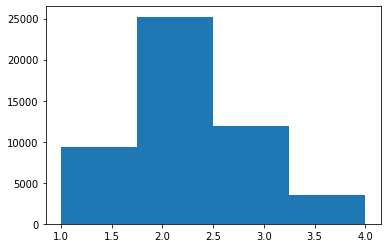

In [20]:
import matplotlib.pylab as plt
plt.hist(fine_attr_num,bins=4)

(array([  527.,  1979.,  5063.,  9387., 11069.,  9350.,  7424.,  4138.,
          977.,    86.]),
 array([ 6. ,  8.1, 10.2, 12.3, 14.4, 16.5, 18.6, 20.7, 22.8, 24.9, 27. ]),
 <BarContainer object of 10 artists>)

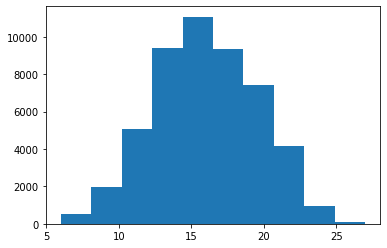

In [21]:
plt.hist(fine_title_len)

In [22]:
pos_coarse_title_len= []
pos_coarse_attr_num = []
with open(pos_coarse_file, 'r') as f:
    for i, data in enumerate(tqdm(f)):
        data = json.loads(data)
        pos_coarse_title_len.append(len(data["title"]))
        pos_coarse_attr_num.append(len(data['key_attr'].keys()))

89588it [00:34, 2602.67it/s]


(array([21276., 40209., 21121.,  6982.]),
 array([0.  , 1.25, 2.5 , 3.75, 5.  ]),
 <BarContainer object of 4 artists>)

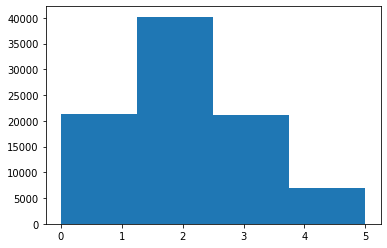

In [25]:
plt.hist(pos_coarse_attr_num,bins=4)

(array([7.0000e+00, 1.1390e+03, 7.4930e+03, 1.2443e+04, 2.8667e+04,
        2.3828e+04, 9.7540e+03, 5.3890e+03, 8.1500e+02, 5.3000e+01]),
 array([ 3. ,  5.7,  8.4, 11.1, 13.8, 16.5, 19.2, 21.9, 24.6, 27.3, 30. ]),
 <BarContainer object of 10 artists>)

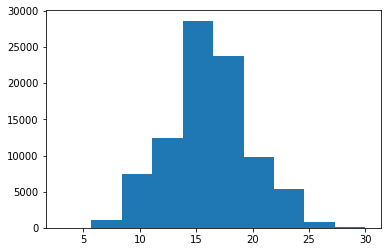

In [26]:
plt.hist(pos_coarse_title_len)

In [28]:
neg_coarse_title_len= []
neg_coarse_attr_num = []
with open(neg_coarse_file, 'r') as f:
    for i, data in enumerate(tqdm(f)):
        data = json.loads(data)
        neg_coarse_title_len.append(len(data["title"]))
        neg_coarse_attr_num.append(len(data['key_attr'].keys()))

10412it [00:04, 2317.62it/s]


(array([    0.,     0., 10412.,     0.]),
 array([-0.5 , -0.25,  0.  ,  0.25,  0.5 ]),
 <BarContainer object of 4 artists>)

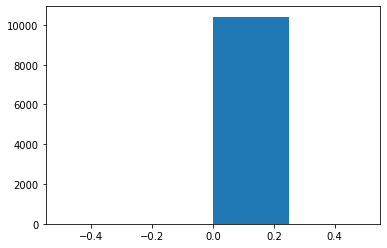

In [31]:
plt.hist(neg_coarse_attr_num, bins=4)

(array([  19.,  135.,  657., 1831., 2379., 2051., 1919., 1100.,  292.,
          29.]),
 array([ 6. ,  8.1, 10.2, 12.3, 14.4, 16.5, 18.6, 20.7, 22.8, 24.9, 27. ]),
 <BarContainer object of 10 artists>)

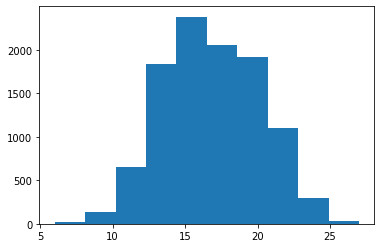

In [30]:
plt.hist(neg_coarse_title_len)

In [7]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
id_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
id_encoder.fit(np.array([0,1,2]).reshape(-1, 1))
id_encoder.transform([[0], [1]],)

array([[1., 0., 0.],
       [0., 1., 0.]])

In [5]:
np.arange(10).reshape(-1, 1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])